**1. Import Libraries**


In [1]:
# Data manipulation
import pandas as pd
import numpy as np

In [2]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
# Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

**2. Data Loading & Intial Inspection**

In [5]:
# Load the dataset
df = pd.read_csv("../dataset/raw/loan_approval_dataset.csv")

In [6]:
# Displaying first few rows 
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [7]:
# Dataset Rows,Columns
df.shape

(4269, 13)

In [8]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [9]:
# statistical Summary
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [10]:
# check for missing values
missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_pct
}).sort_values('Missing_Count', ascending=False)
print(missing_df['Missing_Count'].sum())

0


In [11]:
#check for duplicates
duplicates = df.duplicated().sum()
print(duplicates)

0


**3. Exploratory Data Analysis (EDA)**

3.1 Target Variable Analysis

In [12]:
# Displaying the Loan status
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
target_col ="loan_status"
counts = df[target_col].value_counts()
percentages = df[target_col].value_counts(normalize=True) * 100

print("Loan Status Counts:")
print(counts)

print("\nLoan Status Percentages:")
print(percentages)

Loan Status Counts:
loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

Loan Status Percentages:
loan_status
Approved    62.215976
Rejected    37.784024
Name: proportion, dtype: float64


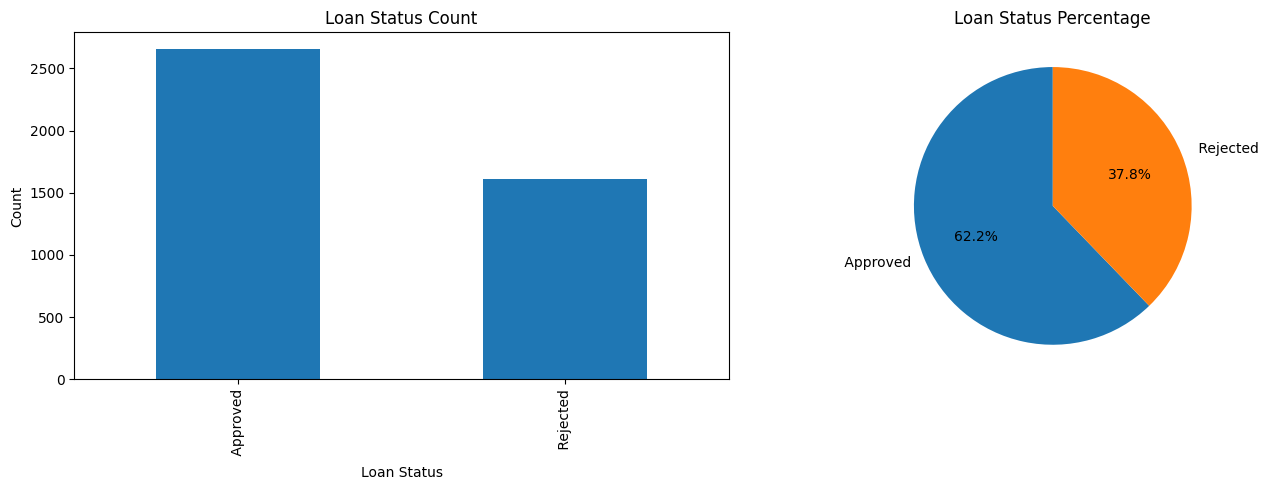

In [13]:
# Loans are Approved and Rejected

# Creating two plots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart: shows the number of Approved vs Rejected loans
df[target_col].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Loan Status Count')
axes[0].set_xlabel('Loan Status')
axes[0].set_ylabel('Count')

# Pie chart: shows the percentage of Approved vs Rejected loans
df[target_col].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90)
axes[1].set_title('Loan Status Percentage')
axes[1].set_ylabel('')

# Adjust layout and show the plots
plt.tight_layout()
plt.savefig('../outputs/figures/target_distribution.png')
plt.show()

3.2 Numerical Features Overview

In [14]:
# Identify numerical features (excluding ID columns)

numerical_cols = [
    col for col in df.select_dtypes(include=np.number).columns
    if 'id' not in col.lower()
]

print(numerical_cols)
categorical_cols = [
    col for col in df.select_dtypes(include='object').columns
    if col != 'loan_status'
]
print(categorical_cols)

['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
['education', 'self_employed']


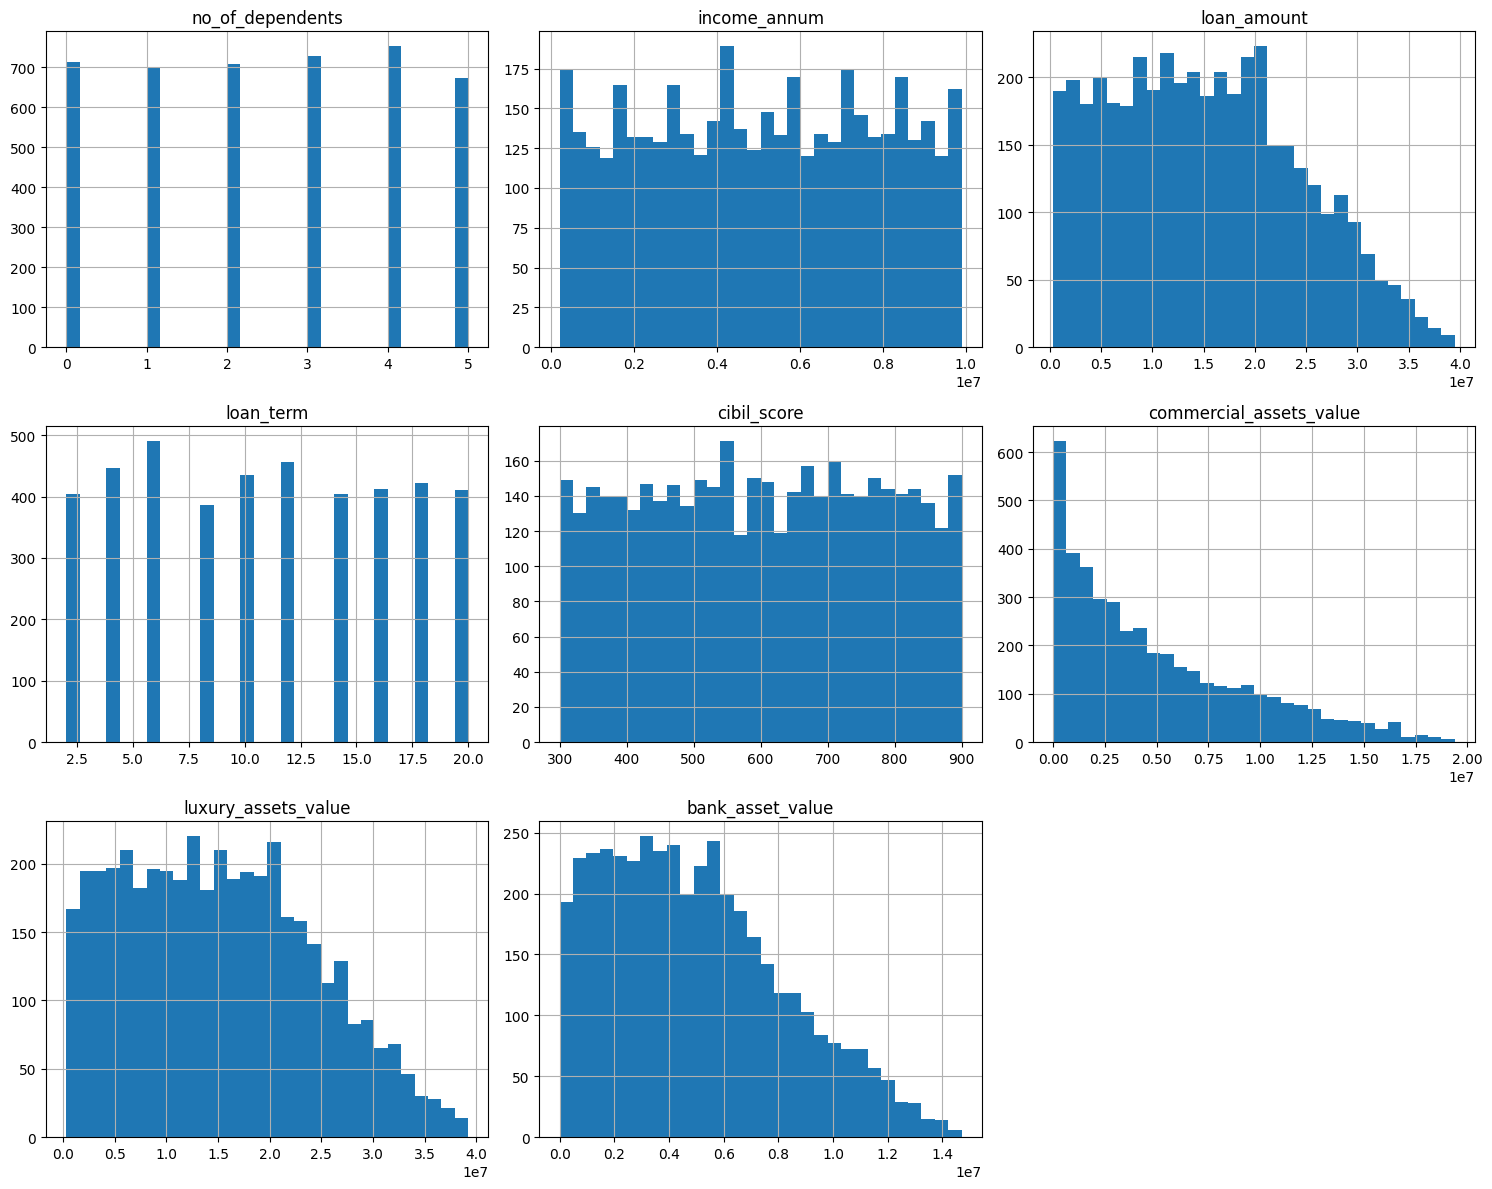

In [15]:
n_cols = len(numerical_cols)
n_rows = (n_cols + 2) // 3

# Histograms
fig, axes = plt.subplots(n_rows, 3, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    df[col].hist(bins=30, ax=axes[i])
    axes[i].set_title(col)

for i in range(n_cols, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.savefig('../outputs/figures/numerical_distributions.png', dpi=300)
plt.show()


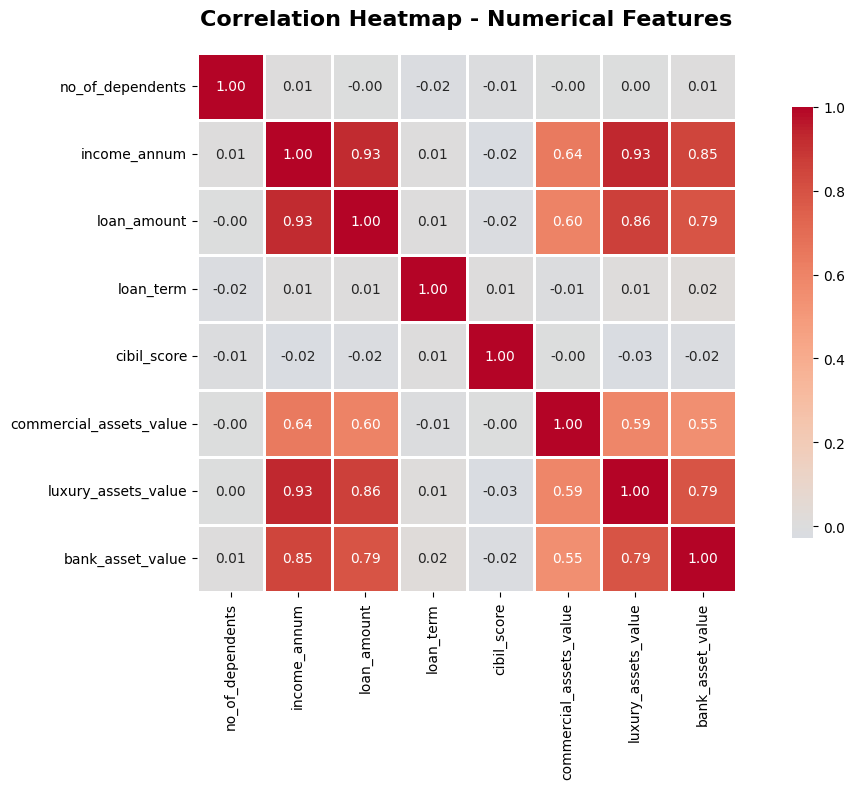

In [16]:
# Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - Numerical Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../outputs/figures/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

**4. Data Cleaning & Preprocessing**

In [17]:
# Copy dataset
df_processed = df.copy()

# Handle missing values
df_processed[numerical_cols] = df_processed[numerical_cols].fillna(
    df_processed[numerical_cols].median()
)
df_processed[categorical_cols] = df_processed[categorical_cols].fillna(
    df_processed[categorical_cols].mode().iloc[0]
)
# Remove ID columns
id_cols = [col for col in df.columns if 'id' in col.lower()]
df_processed.drop(columns=id_cols, inplace=True, errors='ignore')

In [18]:
# Encode categorical variables
encoders = {}
for col in categorical_cols + [target_col]:
    if df_processed[col].dtype == 'object':
        le = LabelEncoder()
        df_processed[col] = le.fit_transform(df_processed[col])
        encoders[col] = le

In [19]:
print("Columns after preprocessing:")
for i, col in enumerate(df_processed.columns):
    print(f"{i}: '{col}'")

Columns after preprocessing:
0: 'no_of_dependents'
1: 'education'
2: 'self_employed'
3: 'income_annum'
4: 'loan_amount'
5: 'loan_term'
6: 'cibil_score'
7: 'commercial_assets_value'
8: 'luxury_assets_value'
9: 'bank_asset_value'
10: 'loan_status'


In [20]:
# Split features and target
X = df_processed.drop(columns=[target_col])
y = df_processed[target_col]

print("\n" + "="*50)
print("FEATURE ENGINEERING")
print("="*50)

# Create new features
print("\nCreating derived features...")

# Check if debt_to_income_ratio already exists
if 'debt_to_income_ratio' not in df_processed.columns:
    df_processed['debt_to_income_ratio'] = df_processed['loan_amount'] / (df_processed['income_annum'] + 1)
    print("✓ Created: debt_to_income_ratio")
else:
    print("✓ debt_to_income_ratio already exists")

# 1. Total Assets (using available asset columns only)
df_processed['total_assets'] = (
    df_processed['commercial_assets_value'] + 
    df_processed['luxury_assets_value'] + 
    df_processed['bank_asset_value']
)
print("✓ Created: total_assets")

# 2. Loan-to-Asset Ratio
df_processed['loan_to_asset_ratio'] = df_processed['loan_amount'] / (df_processed['total_assets'] + 1)
print("✓ Created: loan_to_asset_ratio")

# 3. Monthly Income
df_processed['monthly_income'] = df_processed['income_annum'] / 12
print("✓ Created: monthly_income")

# 4. Monthly Payment (EMI estimate)
df_processed['monthly_payment'] = df_processed['loan_amount'] / df_processed['loan_term']
print("✓ Created: monthly_payment")

# 5. Payment-to-Income Ratio
df_processed['payment_to_income_ratio'] = df_processed['monthly_payment'] / (df_processed['monthly_income'] + 1)
print("✓ Created: payment_to_income_ratio")

print(f"\n✅ Feature engineering complete!")
print(f"New shape: {df_processed.shape}")
print(f"\nAll features:")
print(df_processed.columns.tolist())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


FEATURE ENGINEERING

Creating derived features...
✓ Created: debt_to_income_ratio
✓ Created: total_assets
✓ Created: loan_to_asset_ratio
✓ Created: monthly_income
✓ Created: monthly_payment
✓ Created: payment_to_income_ratio

✅ Feature engineering complete!
New shape: (4269, 17)

All features:
['no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status', 'debt_to_income_ratio', 'total_assets', 'loan_to_asset_ratio', 'monthly_income', 'monthly_payment', 'payment_to_income_ratio']


In [21]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save processed data
df_processed.to_csv('../dataset/processed/loan_data_processed.csv', index=False)

**5. Model Training**

5.1 Defining Models

In [22]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100)
}

5.2 Training Models

In [23]:
results = {}
trained_models = {}
all_predictions = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train model on scaled data
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    all_predictions[name] = y_pred  # Store predictions
    
    # Metrics
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "CV Accuracy": cross_val_score(model, X_train, y_train, cv=5).mean()
    }
    
    trained_models[name] = model  # Store trained model
    
    print(f"✓ {name} trained")


Training Logistic Regression...
✓ Logistic Regression trained

Training Decision Tree...
✓ Decision Tree trained

Training Random Forest...
✓ Random Forest trained


**6. Model Evaultion & Comparsion**

6.1 Displaying Results

In [24]:
print("\n" + "="*50)
print("RESULTS SUMMARY")
print("="*50)

for model, metrics in results.items():
    print(f"\nModel: {model}")
    print(f"Accuracy      : {metrics['Accuracy']:.4f}")
    print(f"Precision     : {metrics['Precision']:.4f}")
    print(f"Recall        : {metrics['Recall']:.4f}")
    print(f"F1 Score      : {metrics['F1 Score']:.4f}")
    print(f"CV Accuracy   : {metrics['CV Accuracy']:.4f}")


RESULTS SUMMARY

Model: Logistic Regression
Accuracy      : 0.9227
Precision     : 0.9186
Recall        : 0.8731
F1 Score      : 0.8952
CV Accuracy   : 0.9122

Model: Decision Tree
Accuracy      : 0.9696
Precision     : 0.9598
Recall        : 0.9598
F1 Score      : 0.9598
CV Accuracy   : 0.9777

Model: Random Forest
Accuracy      : 0.9789
Precision     : 0.9841
Recall        : 0.9598
F1 Score      : 0.9718
CV Accuracy   : 0.9836


6.2 Performance Comparsion Table

In [25]:
from pathlib import Path
# Create comparison table
comparison_data = []

for model_name, result in results.items():
    comparison_data.append({
        'Model': model_name,
        'Accuracy': round(result['Accuracy'], 4),
        'Precision': round(result['Precision'], 4),
        'Recall': round(result['Recall'], 4),
        'F1-Score': round(result['F1 Score'], 4),
        'CV Accuracy': round(result['CV Accuracy'], 4)
    })

comparison_df = pd.DataFrame(comparison_data)

print("\nMODEL PERFORMANCE COMPARISON")
print(comparison_df.to_string(index=False))
Path("../outputs/reports").mkdir(parents=True, exist_ok=True)
comparison_df.to_csv("../outputs/reports/model_comparison.csv", index=False)



MODEL PERFORMANCE COMPARISON
              Model  Accuracy  Precision  Recall  F1-Score  CV Accuracy
Logistic Regression    0.9227     0.9186  0.8731    0.8952       0.9122
      Decision Tree    0.9696     0.9598  0.9598    0.9598       0.9777
      Random Forest    0.9789     0.9841  0.9598    0.9718       0.9836


6.3 Best Model Selection

In [26]:
best_model_name = max(results, key=lambda x: results[x]['Accuracy'])
best_model = results[best_model_name]

print("\nBEST MODEL SELECTED")
print(f"Model       : {best_model_name}")
print(f"Accuracy    : {best_model['Accuracy']:.4f}")
print(f"Precision   : {best_model['Precision']:.4f}")
print(f"Recall      : {best_model['Recall']:.4f}")
print(f"F1-Score    : {best_model['F1 Score']:.4f}")


BEST MODEL SELECTED
Model       : Random Forest
Accuracy    : 0.9789
Precision   : 0.9841
Recall      : 0.9598
F1-Score    : 0.9718


6.4 Classificaton Report

In [27]:
best_model_name = max(results, key=lambda x: results[x]['Accuracy'])
best_predictions = all_predictions[best_model_name]

print(f"\nCLASSIFICATION REPORT - {best_model_name}")
print(classification_report(y_test, best_predictions))


CLASSIFICATION REPORT - Random Forest
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       531
           1       0.98      0.96      0.97       323

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



6.5 Confusion Matrix for Best Model

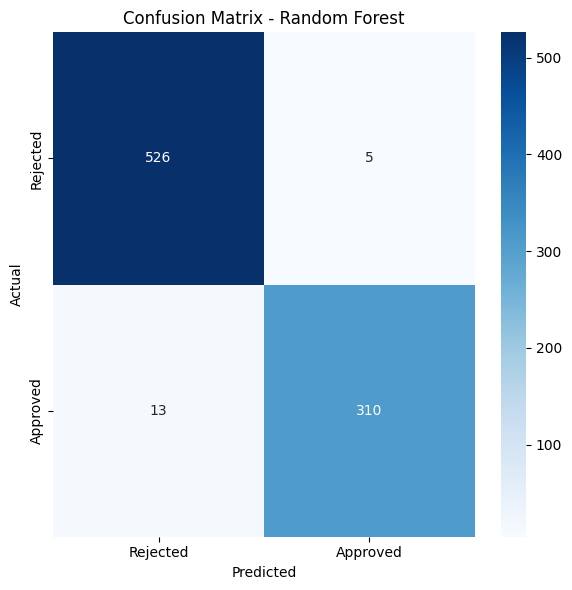

In [37]:
cm = confusion_matrix(y_test, best_predictions)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Rejected', 'Approved'],
            yticklabels=['Rejected', 'Approved'])

plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('../outputs/figures/confusion_matrix_best.png', dpi=300)
plt.show()

6.6 ROC curve for Best Model 

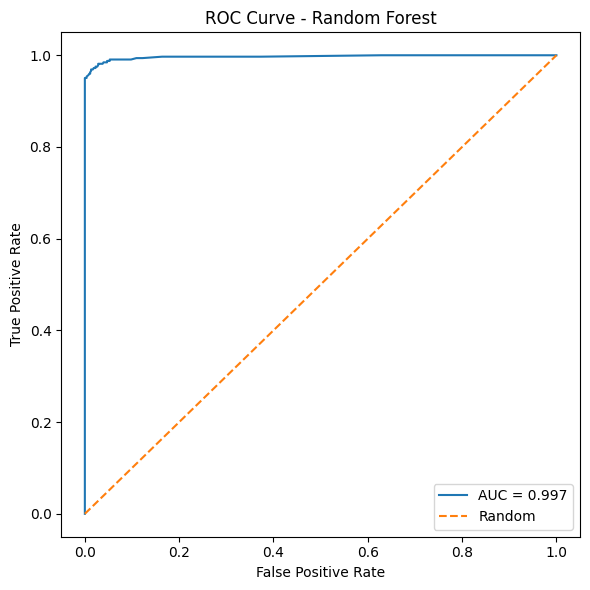

ROC-AUC: 0.9968


In [47]:
best_model_obj = trained_models[best_model_name]

if hasattr(best_model_obj, "predict_proba"):
    y_prob = best_model_obj.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)

    # EXPLICIT FIGURE (IMPORTANT)
    fig, ax = plt.subplots(figsize=(6, 6))

    ax.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
    ax.plot([0, 1], [0, 1], linestyle="--", label="Random")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title(f"ROC Curve - {best_model_name}")
    ax.legend()

    fig.tight_layout()
    fig.savefig('../outputs/figures/roc_curve.png', dpi=500)
    plt.show()
    plt.close(fig)
    print(f"ROC-AUC: {roc_auc:.4f}")


6.7 Model Comparison Chart

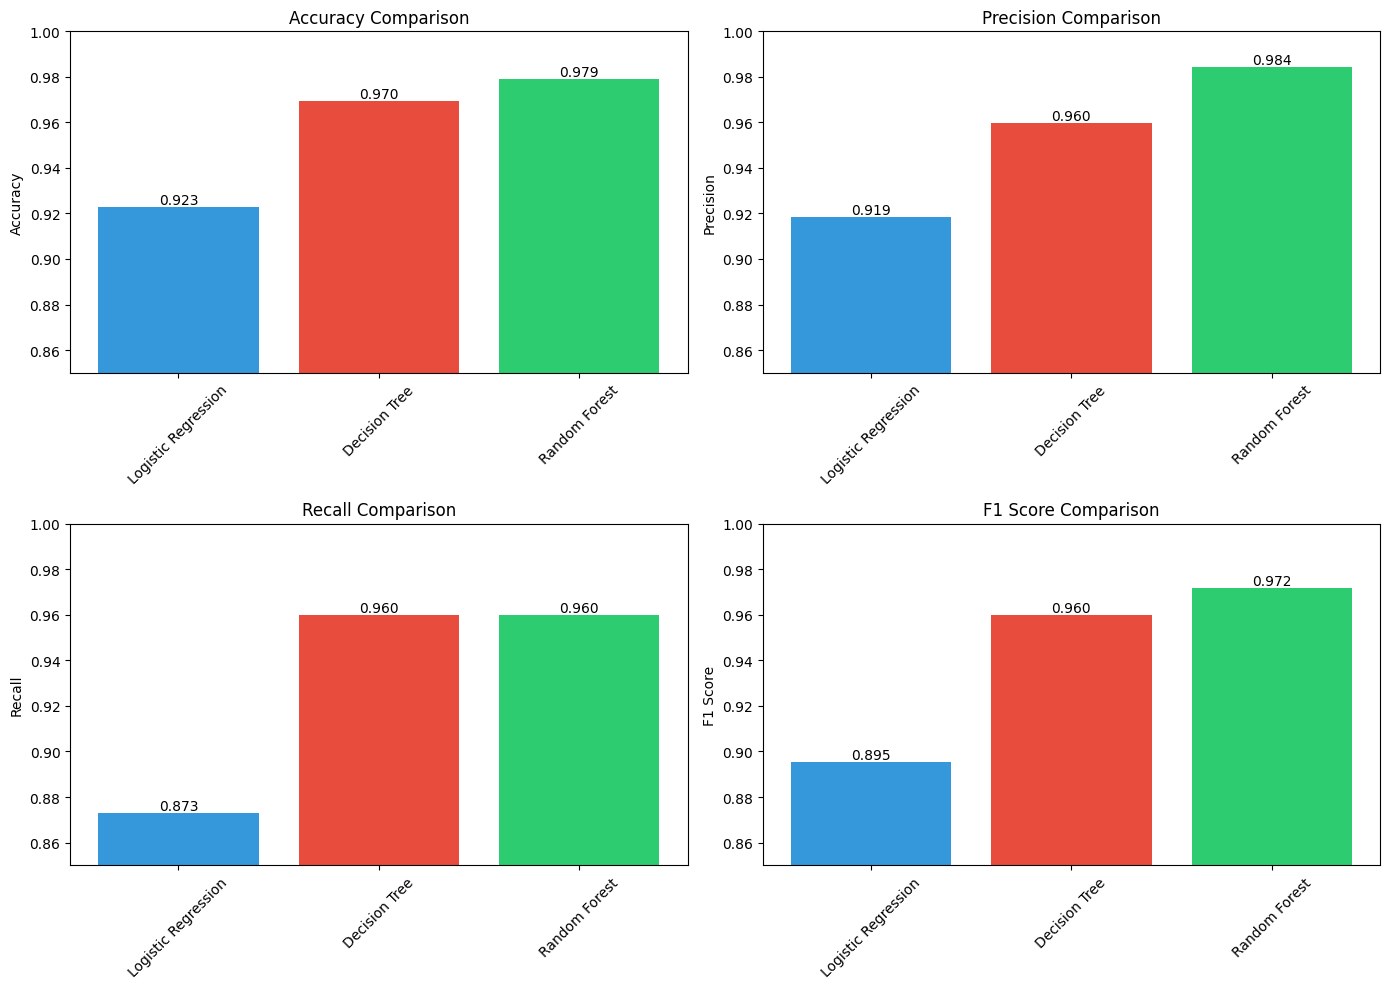

In [30]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, metric in enumerate(metrics):
    model_names = list(results.keys())
    values = [results[name][metric] for name in model_names]
    
    bars = axes[idx].bar(model_names, values, color=['#3498db', '#e74c3c', '#2ecc71'])
    axes[idx].set_title(f'{metric} Comparison')
    axes[idx].set_ylabel(metric)
    axes[idx].set_ylim([0.85, 1.0])
    axes[idx].tick_params(axis='x', rotation=45)
    
    for bar in bars:
        height = bar.get_height()
        axes[idx].text(bar.get_x() + bar.get_width()/2., height,
                      f'{height:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('../outputs/figures/model_comparison.png', dpi=300)
plt.show()

**7.Save**

In [31]:
import joblib

joblib.dump(best_model_obj, '../outputs/models/best_model.pkl')
joblib.dump(scaler, '../outputs/models/scaler.pkl')
joblib.dump(encoders, '../outputs/models/encoders.pkl')
joblib.dump(X.columns.tolist(), '../outputs/models/feature_names.pkl')

print("Models saved!")

Models saved!
